In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2014-01-01'
end = '2024-01-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

/var/folders/q7/zrddzvx10wb5xjnpmdq8m2mr0000gp/T/ipykernel_58932/3952071195.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)


In [6]:
data


Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.560261,27.674898,27.439930,27.618199,73129082
1,2014-01-03,27.359215,27.654595,27.357482,27.606810,66917888
2,2014-01-06,27.664249,27.702378,27.394866,27.557536,71037271
3,2014-01-07,28.197571,28.218122,27.759330,27.854405,102486711
4,2014-01-08,28.256248,28.407034,28.059657,28.374351,90036218
...,...,...,...,...,...,...
2511,2023-12-22,141.876663,142.403530,141.215584,141.290153,18513500
2512,2023-12-26,141.976074,143.094427,141.657958,142.135117,11170100
2513,2023-12-27,140.604233,142.473129,140.217524,141.986019,17288400


In [7]:
ma_100_days = data.Close.rolling(100).mean()

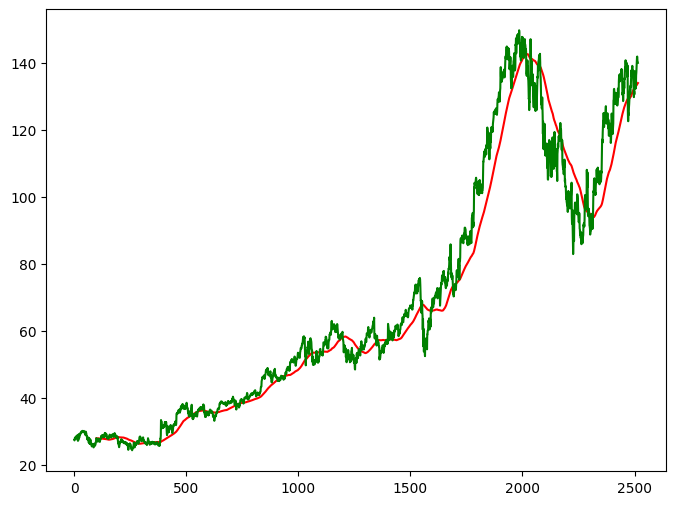

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()


In [9]:
ma_200_days = data.Close.rolling(200).mean()


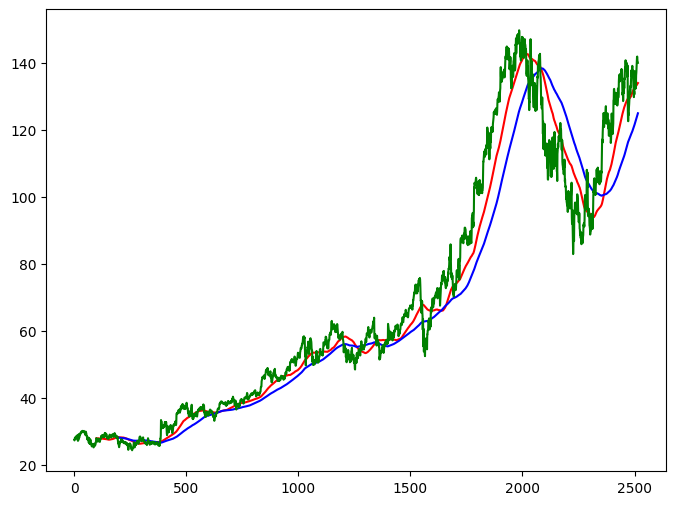

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])       

In [13]:
data_train.shape[0]

2012

In [14]:
data_test.shape[0]

504

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [19]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 0.0278
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0061
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0057
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0049
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0042
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0038
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0041
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0032
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0035
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0029
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0033
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0031
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0029
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0033
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0034
Epoc

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [29]:
data_test_scale = scaler.fit_transform(data_test)

In [31]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)    


In [32]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [37]:
scale =1/scaler.scale_

In [38]:
y_predict = y_predict*scale

In [39]:
y = y*scale

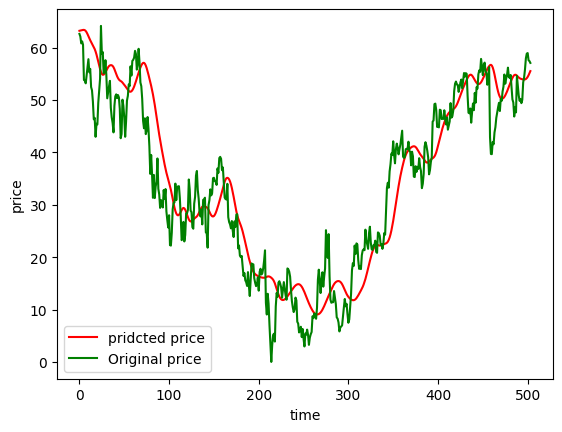

In [42]:
plt.Figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label = 'pridcted price')
plt. plot(y, 'g', label = 'Original price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [43]:
model.save('stock predictions model.keras')